In [132]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [133]:
df=pd.read_csv('C:\\Users\\Ankitude\\PracticeProjects\\ML_1\\Overfitting\dataset\\train.csv')
df_test=pd.read_csv('C:\\Users\\Ankitude\\PracticeProjects\\ML_1\\Overfitting\dataset\\test.csv')


In [134]:
df.head()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,...,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,3,1.0,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,...,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
4,4,1.0,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,...,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253


In [135]:
df.shape

(250, 302)

In [136]:
df.drop('id',axis=1,inplace=True)

In [137]:
df1=df.drop('target',axis=1)

In [138]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,-2.246,1.825,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,0.004,-0.291,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,0.137,0.183,...,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,0.503,0.274,...,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
4,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,-0.012,2.198,...,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253


In [139]:
# Histogram of column data
def plotHistogram(df, nHistogramShown, nHistogramPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nHistRow = (nCol + nHistogramPerRow - 1) / nHistogramPerRow
    plt.figure(num=None, figsize=(6*nHistogramPerRow, 8*nHistRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nHistogramShown)):
        plt.subplot(nHistRow, nHistogramPerRow, i+1)
        df.iloc[:,i].hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()



# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

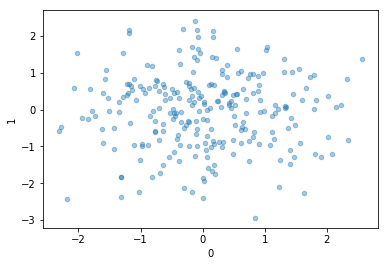

In [140]:
df1.plot(kind="scatter",x='0',y='1',alpha=0.4)

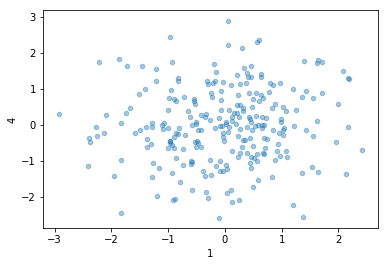

In [141]:
df1.plot(kind="scatter",x='1',y='4',alpha=0.4)

In [142]:
df1.corr()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,1.000000,-0.003871,-0.010487,-0.047819,0.013967,0.070091,-0.022537,0.002832,-0.060031,-0.052356,...,-0.023230,0.053416,-0.143668,-0.007530,-0.060824,-0.024839,-0.051288,0.029143,0.065951,0.038523
1,-0.003871,1.000000,0.013573,-0.018884,0.086743,-0.028023,-0.032914,-0.066416,-0.027201,0.035512,...,-0.006300,-0.077365,-0.021583,-0.054171,-0.046174,0.042820,-0.127499,0.065883,0.055470,-0.056612
2,-0.010487,0.013573,1.000000,-0.031620,0.088980,-0.050191,0.024674,0.035260,-0.000094,0.009949,...,-0.111172,-0.027842,-0.013653,-0.009691,-0.051292,-0.028690,-0.071835,0.069395,0.083946,0.025507
3,-0.047819,-0.018884,-0.031620,1.000000,0.025255,0.172058,0.157954,-0.018158,0.058736,-0.087360,...,-0.114505,0.029415,0.129069,0.096159,-0.027793,-0.005016,0.034551,0.089963,-0.066438,-0.010770
4,0.013967,0.086743,0.088980,0.025255,1.000000,-0.013072,-0.030131,0.037315,-0.186559,0.031577,...,0.096056,0.056339,-0.091165,0.073098,0.158532,-0.050318,-0.030017,0.029747,-0.008517,-0.040654
5,0.070091,-0.028023,-0.050191,0.172058,-0.013072,1.000000,-0.002426,0.087932,0.013425,0.055556,...,0.027638,-0.095449,0.002309,0.049059,-0.032129,0.026868,0.070294,0.069243,-0.048009,-0.084178
6,-0.022537,-0.032914,0.024674,0.157954,-0.030131,-0.002426,1.000000,-0.035602,-0.043699,-0.014648,...,-0.026921,0.133380,-0.024050,-0.012804,0.084606,-0.023192,0.036903,0.037912,0.171640,-0.004655
7,0.002832,-0.066416,0.035260,-0.018158,0.037315,0.087932,-0.035602,1.000000,0.016259,-0.001542,...,0.002158,0.109255,-0.010870,0.010266,0.071022,0.032648,-0.006235,0.014628,-0.031094,-0.122393
8,-0.060031,-0.027201,-0.000094,0.058736,-0.186559,0.013425,-0.043699,0.016259,1.000000,0.059123,...,-0.081837,-0.035636,-0.008774,0.027022,-0.008862,0.017297,-0.071254,0.009224,-0.000516,0.011950
9,-0.052356,0.035512,0.009949,-0.087360,0.031577,0.055556,-0.014648,-0.001542,0.059123,1.000000,...,0.118215,0.018054,0.068017,0.034661,0.091779,0.096561,-0.041897,-0.112156,-0.005721,0.005209


In [143]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [144]:
lr=LinearRegression()

In [145]:
X=df1

In [146]:
y=df['target']

In [147]:
X.shape

(250, 300)

In [148]:
y.shape

(250,)

In [149]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [150]:
print (x_train.shape)
print (x_test.shape)

(200, 300)
(50, 300)


In [151]:
print (y_train.shape)
print (y_test.shape)

(200,)
(50,)


In [152]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [153]:
print(lr.intercept_)
print(lr.coef_)

0.6207453270240778
[ 2.09594558e-02 -5.93739509e-02  3.14836469e-02  1.17717143e-02
 -5.20184545e-02  2.58434376e-02 -7.47013610e-03 -1.61529003e-02
 -4.66622963e-02 -7.06799454e-02 -1.49128139e-02 -2.58892727e-02
 -5.39023350e-02  4.20495923e-02  5.50587962e-02 -2.43503083e-03
 -5.74769839e-03  5.15328464e-02  3.70104644e-02 -5.68583928e-03
  3.01168256e-02 -4.18002667e-02 -1.52962632e-03  1.16226499e-03
  6.15343606e-02  4.37248662e-02  2.64057879e-02 -4.52936916e-02
 -2.57357728e-02 -2.39483203e-02  6.55632555e-03  2.59428402e-02
 -2.42007582e-02  1.04519732e-01  5.34088123e-02 -4.69588991e-06
  1.09607786e-02 -1.86185974e-02 -2.92337780e-02  2.15707273e-02
 -4.02463042e-02 -3.75211045e-02  6.09998173e-02 -1.09565007e-01
 -2.73124300e-02 -5.06628011e-02  4.84834032e-02  9.39202646e-03
  1.31735574e-02  1.12846336e-02  5.51785199e-02  5.08233713e-02
 -1.82370783e-02  2.10282540e-02 -2.86684733e-02  2.83537965e-02
  1.75713824e-02  1.78029652e-03  1.73544373e-03 -7.25808066e-03
  3.11

In [154]:
y_pred=lr.predict(x_test)

y_pred




array([ 0.02588193,  1.22136561,  0.58316523,  1.28243373, -0.8943291 ,
        0.89774712,  0.86640395,  1.57251972,  0.77215017,  0.56080153,
        0.41388182,  0.72113711,  0.00774082,  0.62227986, -0.02960738,
        0.40289617,  0.39226268,  0.45522603,  0.67391231, -0.3524742 ,
        1.09646661, -0.30281243,  0.20186986,  1.03427433,  0.96000249,
        0.50143743,  0.32581209,  0.06569968,  1.56841131,  0.6807546 ,
        0.44541594, -0.71476714,  0.0061263 ,  0.48604502,  0.63114225,
        0.48503448,  0.60944184,  0.60262519,  0.1745692 , -0.23559375,
        0.86933108,  1.41707246,  0.65028487,  0.82333916,  0.65846628,
        0.8581006 ,  1.27057893, -0.20705351,  0.44689778,  0.76174511])

In [155]:
from sklearn.metrics import mean_squared_error

In [156]:
# calculate MAE, MSE, RMSE
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.4858446448474958
0.31899165774050653
0.5647934646758109


In [158]:
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.5647934646758109


In [159]:
from sklearn.model_selection import cross_val_score

In [161]:
lin_scores=cross_val_score(lr,X,y,scoring="neg_mean_squared_error",cv=10)

In [163]:
lin_rmse_scores=np.sqrt(-lin_scores)

In [164]:
 print("Scores:",lin_rmse_scores)

Scores: [0.69380256 0.63051589 0.79006683 0.74123442 0.71591056 0.81749724
 0.72751881 0.70044997 0.7196943  0.73020309]
